# **APRENDIZAGEM SUPERVISIONADA: CLASSIFICAÇÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

# **PRÉ-PROCESSAMENTO**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/heart_tratado.csv',
                    sep=';', encoding='utf-8')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

## **Transformando as variáveis categóricas nominais em variáveis categóricas ordinais**

In [ ]:
df2 = pd.DataFrame.copy(df)

In [ ]:
df2['Sex'].replace({'M':0, 'F': 1}, inplace=True)
df2['ChestPainType'].replace({'TA':0, 'ATA': 1, 'NAP':2, 'ASY': 3}, inplace=True)
df2['RestingECG'].replace({'Normal':0, 'ST': 1, 'LVH':2}, inplace=True)
df2['ExerciseAngina'].replace({'N':0, 'Y': 1}, inplace=True)
df2['ST_Slope'].replace({'Up':0, 'Flat': 1, 'Down':2}, inplace=True)

In [ ]:
df2.head()

In [ ]:
df2.dtypes

In [ ]:
df2.shape

## **LEGENDA**

Age = idade (anos)

Sex = sexo (0=M; 1=F)

Chest Pain Type = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

Resting BP = pressão sanguínea em repouso (mmHg)

Cholesterol = colesterol sérico (mg/dl)

Fasting BS = açúcar no sangue em jejum (mg/dl)
          0: Fasting BS < 120 mg/dl (não diabético)
          1: Fasting BS >= 120 mg/dl, (diabético)

Resting ECG = eletrocardiograma em repouso (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

Max HR = frequência cardíaca máxima

Exercise Angina = Angina induzida por exercício (0=Não; 1=Sim)

Old Peak = Depressão de ST induzida por exercício em relação ao repouso

ST_Slope = Inclinação do segmento ST (0=UP; 1=Flat; 2=Down)

Heart Disease = Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)



## **ATRIBUTOS PREVISORES E ALVO**

In [ ]:
df2.head()

In [ ]:
previsores = df2.iloc[:, 0:11].values


In [ ]:
previsores

In [ ]:
previsores.shape

In [ ]:
alvo = df2.iloc[:, 11].values

In [ ]:
alvo

In [ ]:
alvo.shape

## **Análise das escalas dos atributos (Escalonamento)**

In [ ]:
df2.describe()

Padronização (utiliza a média e o desvio padrão como referência).

Normalização (utiliza os valores máximo e mínimo como referência).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [ ]:
previsores_esc

In [ ]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

In [ ]:
previsoresdf.describe()

## **Codificação de variáveis categóricas**

### **LabelEncoder: transformação de variáveis categóricas em numéricas**


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

In [ ]:
previsores2 = df.iloc[:, 0:11].values
previsores2

In [ ]:
previsores2[:,1] = LabelEncoder().fit_transform(previsores2[:,1])

In [ ]:
previsores2

In [ ]:
previsores2[:,2] = LabelEncoder().fit_transform(previsores2[:,2])
previsores2[:,6] = LabelEncoder().fit_transform(previsores2[:,6])
previsores2[:,8] = LabelEncoder().fit_transform(previsores2[:,8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores2[:,10])

In [ ]:
previsores2

In [ ]:
previsores2.shape

### **OneHotEncoder: Criação de variáveis Dummy (fictícia).**

Cuidado com a multicolinearidade (variáveis altamente correlacionadas entre si).

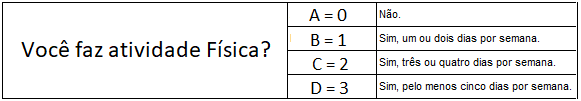

A   B   C   D   
1   0   0   0   
0   1   0   0   
0   0   1   0   
0   0   0   1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ColumnTransformer?

Parâmetros ColumnTransformer
- name: nome dado a transformação.
- transformer: tipo de estimador (OneHotEncoder).
- columns: colunas que serão transformadas.
- remainder: o que acontecerá com o restante das colunas não relacionadas:
1) drop = exclui as outras colunas.
2) passthrough = mantém as outras colunas. drop é default.  
- sparse_threshold: parâmetro de classificação de matrizes esparsas. default é 0.3
- n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum
- transformer_weights: definição de pesos aos transformadores.
-verbose: default é False. se for True a execução é apresentada na tela.

In [ ]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores2)

In [ ]:
previsores3

In [ ]:
previsores3.shape

In [ ]:
previsores3df = pd.DataFrame(previsores3)
previsores3df.head()

In [ ]:
df.head()

## **Escalonamento**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsores3_esc = StandardScaler().fit_transform(previsores3)

In [ ]:
previsores3_esc

In [ ]:
previsores3df = pd.DataFrame(previsores3_esc)
previsores3df

In [ ]:
previsores3df.describe()

## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

previsores3 = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

previsores3_esc = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada.

## **Redução de dimensionalidade**

Objetivo é selecionar os melhores componentes (atributos) para treinamento do algoritmo, através da análise das correlações entre as variáveis.

### Análise dos Componentes Principais (PCA)

**Seleção de características:** seleciona os melhores atributos e utiliza sem transformações.

**Extração de Características:** Encontra os relacionamentos dos melhores atributos e cria novos atributos.

É um algoritmo de aprendizagem não supervisionada.

Aplica-se em dados linearmente separáveis.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
previsores_pca = pca.fit_transform(previsores2)

In [ ]:
previsores_pca.shape

In [ ]:
# Componentes principais
previsores_pca

In [ ]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

In [ ]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

### Kernel PCA

É um algoritmo de aprendizagem não supervisionada.

Aplica-se também em dados linearmente não separáveis.

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=4, kernel='rbf')

In [ ]:
previsores_kernel = kpca.fit_transform(previsores2)

In [ ]:
previsores_kernel.shape

In [ ]:
previsores_kernel

### **Análise do Discriminante Linear (LDA: Linear Discriminant Analysis)**

Algoritmo de aprendizagem supervisionada, pois utiliza a classe como referência para seleção.

Aplicado em situações com muitos atributos previsores e também com o atributo alvo com muitas classes.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)

In [ ]:
previsores_lda = lda.fit_transform(previsores2, alvo)

In [ ]:
previsores_lda

In [ ]:
lda.explained_variance_ratio_

## **Salvando as variáveis (atributos)**

In [ ]:
import pickle

In [ ]:
# Criando arquivo
arq1 = open('heart.pkl', 'wb')

In [ ]:
# Salvando a variável no arquivo
pickle.dump(alvo, arq1)

In [ ]:
# Fechando arquivo
arq1.close()

In [ ]:
# Lendo arquivo
arq1 = open('heart.pkl', 'rb')

In [ ]:
# Chamando a variável
alvo = pickle.load(arq1)

In [ ]:
alvo

In [ ]:
# Criando arquivos e Salvando as variáveis
arq2 = open('heart2.pkl', 'wb')
pickle.dump(previsores, arq2)
arq3 = open('heart3.pkl', 'wb')
pickle.dump(previsores_esc, arq3)
arq4 = open('heart4.pkl', 'wb')
pickle.dump(previsores2, arq4)
arq5 = open('heart5.pkl', 'wb')
pickle.dump(previsores3, arq5)
arq6 = open('heart6.pkl', 'wb')
pickle.dump(previsores3_esc, arq6)

In [ ]:
arq2 = open('heart2.pkl', 'rb')

In [ ]:
previsores = pickle.load(arq2)

In [ ]:
previsores

## **BASE DE TREINO E TESTE**

In [ ]:
from sklearn.model_selection import train_test_split

Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores2, alvo, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape

In [ ]:
x_teste.shape

In [ ]:
y_treino.shape

In [ ]:
y_teste.shape

# **NAIVE BAYES**

https://scikit-learn.org/stable/modules/naive_bayes.html

Treinamento do algoritmo

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive = GaussianNB()
naive.fit(x_treino, y_treino)

Avaliação do algoritmo

In [ ]:
previsoes_naive = naive.predict(x_teste)
previsoes_naive

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_teste, previsoes_naive)

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_naive)

In [ ]:
print(classification_report(y_teste, previsoes_naive))

**Análise dados de treino**

In [ ]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) - previsores3_esc





# **MÁQUINAS DE VETORES DE SUPORTE (SVM)**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='rbf', random_state=1, C = 2)
svm.fit(x_treino, y_treino)

In [ ]:
previsoes_svm = svm.predict(x_teste)
previsoes_svm

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_svm) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_svm)

In [ ]:
print(classification_report(y_teste, previsoes_svm))

**Análise dados de treino**

In [ ]:
previsoes_treino = svm.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = SVC(kernel='rbf', random_state=1, C = 2)
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)



# **REGRESSÃO LOGÍSTICA**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
logistica.fit(x_treino, y_treino)

In [ ]:
logistica.intercept_

In [ ]:
logistica.coef_

In [ ]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_logistica)

In [ ]:
print(classification_report(y_teste, previsoes_logistica))

**Análise dados de treino**

In [ ]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = LogisticRegression(random_state=1, max_iter=600, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

# **APRENDIZAGEM BASEADA EM INSTÂNCIAS (KNN)**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)
knn.fit(x_treino, y_treino)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html

In [ ]:
previsoes_knn = knn.predict(x_teste)
previsoes_knn

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_knn)

In [ ]:
print(classification_report(y_teste, previsoes_knn))

**Análise dados de treino**

In [ ]:
previsoes_treino = knn.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)



# **ÁRVORE DE DECISÃO**

https://scikit-learn.org/stable/modules/tree.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
arvore.fit(x_treino, y_treino)

In [ ]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_arvore)

In [ ]:
print(classification_report(y_teste, previsoes_arvore))

**Análise dados de treino**

In [ ]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

# **RANDOM FOREST**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

In [ ]:
previsoes_random = random.predict(x_teste)
previsoes_random

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_random)

In [ ]:
print(classification_report(y_teste, previsoes_random))

**Análise dados de treino**

In [ ]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

# **XGBOOST**

https://xgboost.readthedocs.io/en/stable/

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
xg.fit(x_treino,y_treino)

In [ ]:
previsoes_xg = xg.predict(x_teste)
previsoes_xg

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_xg) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_xg)

In [ ]:
print(classification_report(y_teste, previsoes_xg))

**Análise dados de treino**

In [ ]:
previsoes_treino = xg.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
resultado = cross_val_score(modelo, previsores2, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)

# **LIGHTGBM**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.train.html

In [ ]:
# Instalação do Algoritmo
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
# Dataset para treino
dataset = lgb.Dataset(x_treino,label=y_treino)

**Hiperparâmetros**

**Controle de ajuste**

num_leaves : define o número de folhas a serem formadas em uma árvore. Não tem uma relação direta entre num_leaves e max_depth e, portanto, os dois não devem estar vinculados um ao outro.

max_depth : especifica a profundidade máxima ou nível até o qual a árvore pode crescer.

**Controle de velocidade**

learning_rate: taxa de aprendizagem, determina o impacto de cada árvore no resultado final.

max_bin : O valor menor de max_bin reduz muito tempo de procesamento, pois agrupa os valores do recurso em caixas discretas, o que é computacionalmente mais barato.

**Controle de precisão**

num_leaves : valor alto produz árvores mais profundas com maior precisão, mas leva ao overfitting.

max_bin : valores altos tem efeito semelhante ao causado pelo aumento do valor de num_leaves e também torna mais lento o procedimento de treinamento.

In [ ]:
# Parâmetros
parametros = {'num_leaves':250, # número de folhas
              'objective':'binary', # classificação Binária
              'max_depth':2,
              'learning_rate':.05,
              'max_bin':100}

In [ ]:
lgbm=lgb.train(parametros,dataset,num_boost_round=200)

In [ ]:
# Marcação do tempo de execução
from datetime import datetime
inicio=datetime.now()
lgbm=lgb.train(parametros,dataset)
fim=datetime.now()

tempo = fim - inicio
tempo

In [ ]:
previsoes_lgbm = lgbm.predict(x_teste)
previsoes_lgbm

In [ ]:
previsoes_lgbm.shape

In [ ]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 276):
    if previsoes_lgbm[i] >= .5:
       previsoes_lgbm[i] = 1
    else:
       previsoes_lgbm[i] = 0

In [ ]:
previsoes_lgbm

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_lgbm) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_lgbm)

**Análise dados de treino**

In [ ]:
previsoes_treino = lgbm.predict(x_treino)
previsoes_treino

In [ ]:
previsoes_treino.shape

In [ ]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 641):
    if previsoes_treino[i] >= .5:
       previsoes_treino[i] = 1
    else:
       previsoes_treino[i] = 0

In [ ]:
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',
                            max_depth = 2, learning_rate = .05, max_bin =100)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

# **CATBOOST**

https://catboost.ai/en/docs/

In [ ]:
#Instalação
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
df

In [ ]:
previsores4 = df.iloc[:, 0:11]

In [ ]:
previsores4.head()

In [ ]:
alvo4 = df.iloc[:, 11]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores4, alvo4, test_size = 0.3, random_state = 0)

In [ ]:
categoricas = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
catboost = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5,
                              eval_metric="Accuracy")

In [ ]:
catboost.fit( x_treino, y_treino, cat_features= categoricas, plot=True, eval_set=(x_teste, y_teste))

In [ ]:
previsoes_cat = catboost.predict(x_teste)
previsoes_cat

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_cat) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_cat)

**Análise dados de treino**

In [ ]:
previsoes_treino = catboost.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5,
                              eval_metric="Accuracy")
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

**XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)**

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

CatBoost = 86,96% (treino e teste) previsores4 - 240 acertos e 88% (validação cruzada com previsores) - CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, eval_metric="Accuracy")

# **Salvando dados para Deploy**

In [ ]:
previsores

In [ ]:
alvo

In [ ]:
np.savetxt('previsores.csv', previsores, delimiter=',')

In [ ]:
np.savetxt('alvo.csv', alvo, delimiter=',')

# **NOÇÕES DE OTIMIZAÇÃO DE HIPERPARÂMETROS**

## **Grid Search (classificador Gradient Boosting)**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Criando o algoritmo
gbm = GradientBoostingClassifier(random_state=0)

In [ ]:
# Determinando o espaço do hiperparâmetro
param_grid = dict(
    n_estimators=[20, 50, 100, 250],
    learning_rate=[0.05, 0.1, 0.5],
    max_depth=[1,2,3,4,5],
    )

In [ ]:
print('Número de combinações de Hiperparâmetros: ',
      len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth']))

In [ ]:
# Configurando a procura com o Grid search
grid_search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=4)

In [ ]:
# Configurando os melhores hiperparâmetros
grid_search.fit(x_treino, y_treino)

In [ ]:
# Melhores Hiperparâmetros
grid_search.best_params_

In [ ]:
# Relação dos dados para todos os modelos

resultado = pd.DataFrame(grid_search.cv_results_)
print(resultado.shape)
resultado.head(3)

In [ ]:
# Ordenando os melhores resultados
resultado.sort_values(by='mean_test_score', ascending=False, inplace=True)

resultado.reset_index(drop=True, inplace=True)

resultado[['param_max_depth', 'param_learning_rate', 'param_n_estimators',
    'mean_test_score', 'std_test_score']].head()

# **DESAFIO 1**

DESENVOLVER E SELECIONAR O MELHOR ALGORITMO DE MACHINE LEARNING DE CLASSIFICAÇÃO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data